In [1]:
!pip install alpha_vantage

In [59]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import timedelta
%matplotlib inline

In [3]:
api_key = '80A8HGQ6DP7XJWWU'

In [4]:
ts = CryptoCurrencies(key=api_key, output_format='pandas')

In [5]:
ETH, ETH_meta_data = ts.get_digital_currency_intraday(symbol='ETH', market='USD')
OMG, OMG_meta_data = ts.get_digital_currency_intraday(symbol='OMG', market='USD')
QTUM, QTUM_meta_data = ts.get_digital_currency_intraday(symbol='QTUM', market='USD')
GNT, GNT_meta_data = ts.get_digital_currency_intraday(symbol='GNT', market='USD')

In [6]:
ETH.head()

,. price (USD),. price (USD),volume,market cap (USD)
Date,,,,
2017-11-24 07:50:00,410.693209,410.693209,1.208230e+06,4.962119e+08
2017-11-24 07:55:00,409.201267,409.201267,1.205831e+06,4.934275e+08
2017-11-24 08:00:00,408.408844,408.408844,1.206227e+06,4.926338e+08
2017-11-24 08:05:00,407.059635,407.059635,1.204465e+06,4.902890e+08
2017-11-24 08:10:00,405.368794,405.368794,1.204697e+06,4.883467e+08


In [7]:
OMG.head()

,. price (USD),. price (USD),volume,market cap (USD)
Date,,,,
2017-11-24 07:50:00,7.526512,7.526512,794119.975184,5.976954e+06
2017-11-24 07:55:00,7.529611,7.529611,787905.901237,5.932625e+06
2017-11-24 08:00:00,7.565498,7.565498,785614.475727,5.943565e+06
2017-11-24 08:05:00,7.564998,7.564998,780216.718798,5.902338e+06
2017-11-24 08:10:00,7.545705,7.545705,780271.850277,5.887701e+06


In [8]:
QTUM.head()

,. price (USD),. price (USD),volume,market cap (USD)
Date,,,,
2017-11-24 07:50:00,13.514832,13.514832,181684.535689,2.455436e+06
2017-11-24 07:55:00,13.514832,13.514832,181684.535689,2.455436e+06
2017-11-24 08:00:00,13.447911,13.447911,176107.245883,2.368274e+06
2017-11-24 08:05:00,13.399971,13.399971,174733.093170,2.341418e+06
2017-11-24 08:10:00,13.310084,13.310084,175119.443229,2.330855e+06


In [9]:
GNT.head()

,. price (USD),. price (USD),volume,market cap (USD)
Date,,,,
2017-11-24 07:50:00,0.225890,0.225890,286550.243645,64728.937434
2017-11-24 07:55:00,0.225541,0.225541,285634.707635,64422.317674
2017-11-24 08:00:00,0.225541,0.225541,285631.207635,64421.477674
2017-11-24 08:05:00,0.224832,0.224832,283826.620875,63813.281022
2017-11-24 08:10:00,0.225930,0.225930,285611.620485,64528.289256


In [10]:
ETH = ETH.iloc[:, [0, 2, 3]]
OMG = OMG.iloc[:, [0, 2, 3]]
QTUM = QTUM.iloc[:, [0, 2, 3]]
GNT = GNT.iloc[:, [0, 2, 3]]

In [11]:
ETH.head()

,. price (USD),volume,market cap (USD)
Date,,,
2017-11-24 07:50:00,410.693209,1.208230e+06,4.962119e+08
2017-11-24 07:55:00,409.201267,1.205831e+06,4.934275e+08
2017-11-24 08:00:00,408.408844,1.206227e+06,4.926338e+08
2017-11-24 08:05:00,407.059635,1.204465e+06,4.902890e+08
2017-11-24 08:10:00,405.368794,1.204697e+06,4.883467e+08


In [23]:
col_names = {'. price (USD)': 'price_USD', 'market cap (USD)': 'marketcap_USD'}
ETH.rename(columns=col_names, inplace=True)
OMG.rename(columns=col_names, inplace=True)
QTUM.rename(columns=col_names, inplace=True)
GNT.rename(columns=col_names, inplace=True)

In [24]:
isinstance(ETH.index, pd.DatetimeIndex)

True

In [25]:
ETH.index = pd.to_datetime(ETH.index)
OMG.index = pd.to_datetime(OMG.index)
QTUM.index = pd.to_datetime(QTUM.index)
GNT.index = pd.to_datetime(GNT.index)

In [26]:
isinstance(ETH.index, pd.DatetimeIndex)

True

In [27]:
timedifference = [0, 5, 10, 15, 20]
timedifference_str = ['0', '5', '10', '15', '20']
altcoins = [OMG, QTUM, GNT]
altcoins_str = ['OMG', 'QTUM', 'GNT']
original_index = ETH.index

In [28]:
for i in range(len(timedifference)):
    eth_shift = timedelta(minutes=timedifference[i])
    ETH.index = original_index + eth_shift
    for j in range(len(altcoins)):
        locals()[altcoins_str[j] + 'ETH' + timedifference_str[i]] = \
        pd.concat([altcoins[j], ETH], axis=1, keys=[altcoins_str[j], 'ETH']).dropna()

In [29]:
OMGETH0.head()

OMG                                      ETH  \
                    price_USD         volume marketcap_USD   price_USD   
Date                                                                     
2017-11-24 08:10:00  7.545705  780271.850277  5.887701e+06  410.693209   
2017-11-24 08:15:00  7.529611  775485.909029  5.839107e+06  409.201267   
2017-11-24 08:20:00  7.503029  776456.707491  5.825777e+06  408.408844   
2017-11-24 08:25:00  7.485036  778567.474332  5.827606e+06  407.059635   
2017-11-24 08:30:00  7.489434  777745.717637  5.824875e+06  405.368794   

                                                 
                           volume marketcap_USD  
Date                                             
2017-11-24 08:10:00  1.208230e+06  4.962119e+08  
2017-11-24 08:15:00  1.205831e+06  4.934275e+08  
2017-11-24 08:20:00  1.206227e+06  4.926338e+08  
2017-11-24 08:25:00  1.204465e+06  4.902890e+08  
2017-11-24 08:30:00  1.204697e+06  4.883467e+08

In [30]:
OMGETH5.head()

OMG                                      ETH  \
                    price_USD         volume marketcap_USD   price_USD   
Date                                                                     
2017-11-24 08:15:00  7.529611  775485.909029  5.839107e+06  410.693209   
2017-11-24 08:20:00  7.503029  776456.707491  5.825777e+06  409.201267   
2017-11-24 08:25:00  7.485036  778567.474332  5.827606e+06  408.408844   
2017-11-24 08:30:00  7.489434  777745.717637  5.824875e+06  407.059635   
2017-11-24 08:35:00  7.513025  773387.922988  5.810483e+06  405.368794   

                                                 
                           volume marketcap_USD  
Date                                             
2017-11-24 08:15:00  1.208230e+06  4.962119e+08  
2017-11-24 08:20:00  1.205831e+06  4.934275e+08  
2017-11-24 08:25:00  1.206227e+06  4.926338e+08  
2017-11-24 08:30:00  1.204465e+06  4.902890e+08  
2017-11-24 08:35:00  1.204697e+06  4.883467e+08

In [31]:
OMGETH10.head()

OMG                                      ETH  \
                    price_USD         volume marketcap_USD   price_USD   
Date                                                                     
2017-11-24 08:20:00  7.503029  776456.707491  5.825777e+06  410.693209   
2017-11-24 08:25:00  7.485036  778567.474332  5.827606e+06  409.201267   
2017-11-24 08:30:00  7.489434  777745.717637  5.824875e+06  408.408844   
2017-11-24 08:35:00  7.513025  773387.922988  5.810483e+06  407.059635   
2017-11-24 08:40:00  7.515024  772881.889827  5.808226e+06  405.368794   

                                                 
                           volume marketcap_USD  
Date                                             
2017-11-24 08:20:00  1.208230e+06  4.962119e+08  
2017-11-24 08:25:00  1.205831e+06  4.934275e+08  
2017-11-24 08:30:00  1.206227e+06  4.926338e+08  
2017-11-24 08:35:00  1.204465e+06  4.902890e+08  
2017-11-24 08:40:00  1.204697e+06  4.883467e+08

In [32]:
OMGETH15.head()

OMG                                      ETH  \
                    price_USD         volume marketcap_USD   price_USD   
Date                                                                     
2017-11-24 08:25:00  7.485036  778567.474332  5.827606e+06  410.693209   
2017-11-24 08:30:00  7.489434  777745.717637  5.824875e+06  409.201267   
2017-11-24 08:35:00  7.513025  773387.922988  5.810483e+06  408.408844   
2017-11-24 08:40:00  7.515024  772881.889827  5.808226e+06  407.059635   
2017-11-24 08:45:00  7.500033  770339.901730  5.777574e+06  405.368794   

                                                 
                           volume marketcap_USD  
Date                                             
2017-11-24 08:25:00  1.208230e+06  4.962119e+08  
2017-11-24 08:30:00  1.205831e+06  4.934275e+08  
2017-11-24 08:35:00  1.206227e+06  4.926338e+08  
2017-11-24 08:40:00  1.204465e+06  4.902890e+08  
2017-11-24 08:45:00  1.204697e+06  4.883467e+08

In [33]:
OMGETH20.head()

OMG                                      ETH  \
                    price_USD         volume marketcap_USD   price_USD   
Date                                                                     
2017-11-24 08:30:00  7.489434  777745.717637  5.824875e+06  410.693209   
2017-11-24 08:35:00  7.513025  773387.922988  5.810483e+06  409.201267   
2017-11-24 08:40:00  7.515024  772881.889827  5.808226e+06  408.408844   
2017-11-24 08:45:00  7.500033  770339.901730  5.777574e+06  407.059635   
2017-11-24 08:50:00  7.489037  767356.260420  5.746760e+06  405.368794   

                                                 
                           volume marketcap_USD  
Date                                             
2017-11-24 08:30:00  1.208230e+06  4.962119e+08  
2017-11-24 08:35:00  1.205831e+06  4.934275e+08  
2017-11-24 08:40:00  1.206227e+06  4.926338e+08  
2017-11-24 08:45:00  1.204465e+06  4.902890e+08  
2017-11-24 08:50:00  1.204697e+06  4.883467e+08

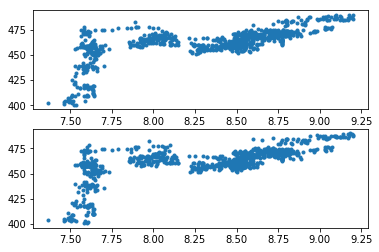

In [42]:
plt.subplot(2, 1, 1)
plt.plot(OMGETH0.OMG.price_USD, OMGETH0.ETH.price_USD, marker='.', linestyle='none')
plt.subplot(2, 1, 2)
plt.plot(OMGETH20.OMG.price_USD, OMGETH20.ETH.price_USD, marker='.', linestyle='none')

In [48]:
np.corrcoef(OMGETH0.OMG.price_USD, OMGETH0.ETH.price_USD)[0,1]

0.66067586798137334

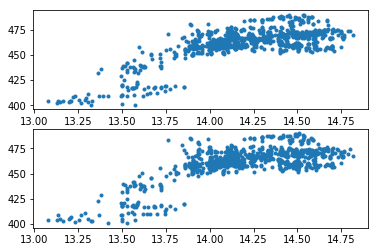

In [43]:
plt.subplot(2, 1, 1)
plt.plot(QTUMETH0.QTUM.price_USD, QTUMETH0.ETH.price_USD, marker='.', linestyle='none')
plt.subplot(2, 1, 2)
plt.plot(QTUMETH20.QTUM.price_USD, QTUMETH20.ETH.price_USD, marker='.', linestyle='none')

In [49]:
np.corrcoef(QTUMETH0.QTUM.price_USD, QTUMETH0.ETH.price_USD)[0,1]

0.7354252394594053

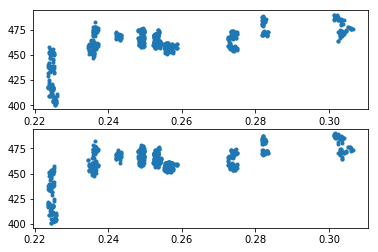

In [50]:
plt.subplot(2, 1, 1)
plt.plot(GNTETH0.GNT.price_USD, GNTETH0.ETH.price_USD, marker='.', linestyle='none')
plt.subplot(2, 1, 2)
plt.plot(GNTETH20.GNT.price_USD, GNTETH20.ETH.price_USD, marker='.', linestyle='none')

In [52]:
np.corrcoef(GNTETH0.GNT.price_USD, GNTETH0.ETH.price_USD)[0,1]

0.63735443337697351

In [66]:
price_df = pd.concat([OMGETH0.ETH.price_USD, OMGETH10.ETH.price_USD, OMGETH20.ETH.price_USD, \
                    OMGETH0.OMG.price_USD, QTUMETH0.QTUM.price_USD, GNTETH0.GNT.price_USD], \
                   axis=1, keys=['ETH0', 'ETH10', 'ETH20', 'OMG', 'QTUM', 'GNT']).dropna()
price_df.head()

,ETH0,ETH10,ETH20,OMG,QTUM,GNT
Date,,,,,,
2017-11-24 08:30:00,405.368794,408.408844,410.693209,7.489434,13.289111,0.225733
2017-11-24 08:35:00,402.580173,407.059635,409.201267,7.513025,13.268137,0.225733
2017-11-24 08:40:00,403.742815,405.368794,408.408844,7.515024,13.137301,0.225733
2017-11-24 08:45:00,404.671936,402.580173,407.059635,7.500033,13.212206,0.225563
2017-11-24 08:50:00,404.493694,403.742815,405.368794,7.489037,13.204213,0.225563


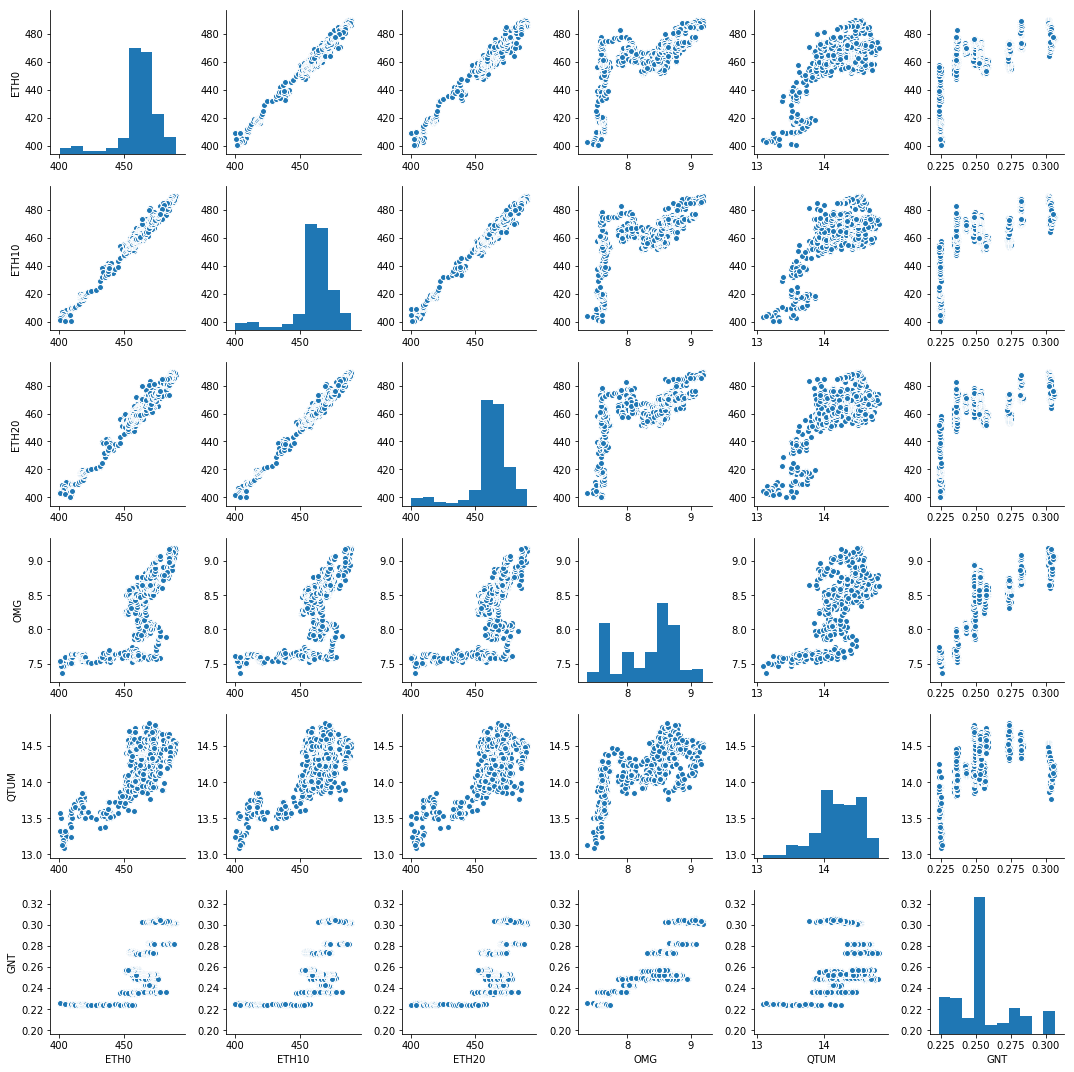

In [67]:
sns.pairplot(price_df)

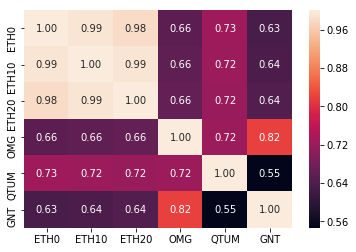

In [68]:
sns.heatmap(price_df.corr(), annot=True, fmt='.2f')